In [57]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 MB 5.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 6.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 7.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 7.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 9.9 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.

Note: you may need to restart the kernel to use updated packages.


# Import the necessary packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [2]:
# Load the data with specified bcolumn classes
solar_flare = pd.read_csv("Dataset/hessi.solar.flare.2002to2016.csv", parse_dates=["start.date"], 
                          dtype={"energy.kev": "category", "total.counts": "float64", "active.region.ar": "category"})
solar_flare.head()

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


In [3]:
solar_flare['start.date'] = solar_flare['start.date'].dt.strftime('%Y-%m-%d')

In [4]:
solar_flare['start_datetime'] = pd.to_datetime(solar_flare['start.date'] + ' ' + solar_flare['peak'])
solar_flare['start_datetime']

0        2002-02-12 21:33:38
1        2002-02-12 21:45:06
2        2002-02-13 00:54:54
3        2002-02-13 04:23:50
4        2002-02-13 07:05:14
                 ...        
113937   2016-12-26 22:17:02
113938   2016-12-26 23:28:18
113939   2016-12-27 08:39:06
113940   2016-12-27 12:21:30
113941   2016-12-27 12:37:14
Name: start_datetime, Length: 113942, dtype: datetime64[ns]

In [5]:
# Set 'start_datetime' as the index of the DataFrame
solar_flare.set_index('start_datetime', inplace=True)

In [6]:
# Drop the specified columns from the 'solar_flare' DataFrame
columns_to_drop = ['start.date', 'start.time', 'peak', 'end']
solar_flare = solar_flare.drop(columns=columns_to_drop)

solar_flare

,flare,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
start_datetime,,,,,,,,,,,,,,
2002-02-12 21:33:38,2021213,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
2002-02-12 21:45:06,2021228,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2002-02-13 00:54:54,2021332,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
2002-02-13 04:23:50,2021308,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
2002-02-13 07:05:14,2021310,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26 22:17:02,16122603,484,152,75328.0,3-6,0,0,0,0,A0,GE,NS,PE,Q2
2016-12-26 23:28:18,16122604,1096,304,142048.0,3-6,0,0,0,0,A0,DR,NS,PE,Q2
2016-12-27 08:39:06,16122701,392,80,32344.0,3-6,0,0,0,0,A0,DF,NS,PE,Q3 SE


Peak Rate: peak counts/second in energy range 6-12 keV, averaged over active collimators, including background.<br>

Total Counts: counts in energy range 6-12 keV integrated over duration of flare summed over all subcollimators,
including background.<br>

Energy: the highest energy band in which the flare was observed. Electron Kev (kilo electron volt)<br>
https://en.wikipedia.org/wiki/Electronvolt<br>

Radial Distance: distance from Sun center<br>

Quality Codes: Qn, where n is the total number of data gap, SAA, particle, eclipse or decimation flags set for event.<br>
n ranges from 0 to 11. Use care when analyzing the data when the quality is not zero.<br>
<br>
Active_Region: A number for the closest active region, if available<br>

radial_offset: the offset of the flare position from the spin axis of the spacecraft in arcsec. This is used i
spectroscopy.<br>

peak_c/s: peak count rate in corrected counts.<br>

Flare Flag Codes:<br>
a0 - In attenuator state 0 (None) sometime during flare<br>
a1 - In attenuator state 1 (Thin) sometime during flare<br>
a2 - In attenuator state 2 (Thick) sometime during flare<br>
a3 - In attenuator state 3 (Both) sometime during flare<br>
An - Attenuator state (0=None, 1=Thin, 2=Thick, 3=Both) at peak of flare<br>
DF - Front segment counts were decimated sometime during flare<br>
DR - Rear segment counts were decimated sometime during flare<br>
ED - Spacecraft eclipse (night) sometime during flare<br>
EE - Flare ended in spacecraft eclipse (night)<br>
ES - Flare started in spacecraft eclipse (night)<br>
FE - Flare ongoing at end of file<br>
FR - In Fast Rate Mode<br>
FS - Flare ongoing at start of file<br>
GD - Data gap during flare<br>
GE - Flare ended in data gap<br>
GS - Flare started in data gap<br>
MR - Spacecraft in high-latitude zone during flare<br>
NS - Non-solar event<br>
PE - Particle event: Particles are present<br>
PS - Possible Solar Flare; in front detectors, but no position<br>
Pn - Position Quality: P0 = Position is NOT valid, P1 = Position is valid<br>
Qn - Data Quality: Q0 = Highest Quality, Q11 = Lowest Quality<br>
SD - Spacecraft was in SAA sometime during flare<br>
SE - Flare ended when spacecraft was in SAA<br>
SS - Flare started when spacecraft was in SAA<br>

In [7]:
solar_flare.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113942 entries, 2002-02-12 21:33:38 to 2016-12-27 12:37:14
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   flare             113942 non-null  int64   
 1   duration.s        113942 non-null  int64   
 2   peak.c/s          113942 non-null  int64   
 3   total.counts      113942 non-null  float64 
 4   energy.kev        113942 non-null  category
 5   x.pos.asec        113942 non-null  int64   
 6   y.pos.asec        113942 non-null  int64   
 7   radial            113942 non-null  int64   
 8   active.region.ar  113942 non-null  category
 9   flag.1            113942 non-null  object  
 10  flag.2            113942 non-null  object  
 11  flag.3            94035 non-null   object  
 12  flag.4            93740 non-null   object  
 13  flag.5            52991 non-null   object  
dtypes: category(2), float64(1), int64(6), object(5)
memory usage: 11.7

In [8]:
solar_flare.describe()

,flare,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial
count,1.139420e+05,113942.000000,113942.000000,1.139420e+05,113942.000000,113942.000000,113942.000000
mean,1.086459e+07,493.051728,212.321532,3.772013e+05,-9.752181,-43.129812,689.528892
std,9.832864e+06,433.389295,833.776871,3.071203e+06,757.017401,404.547666,513.203089
min,2.021213e+06,8.000000,0.000000,8.000000e+00,-10012.000000,-10005.000000,0.000000
25%,4.110734e+06,212.000000,28.000000,2.292000e+04,-704.000000,-249.000000,469.000000
50%,1.112022e+07,364.000000,53.000000,5.857400e+04,0.000000,-75.000000,759.000000
75%,1.403013e+07,628.000000,144.000000,1.794420e+05,706.000000,198.000000,946.000000
max,1.412161e+08,4444.000000,113156.000000,4.355501e+08,1002.000000,1012.000000,14154.000000


In [9]:
duplicates_count = solar_flare['flare'].duplicated(keep=False).sum()

value_counts = solar_flare['flare'].value_counts()

duplicates = value_counts[value_counts>1]
print(duplicates)
print(f"Number of duplicates in the 'flare' column: {len(duplicates)}")

flare
13111352    2
13111351    2
3042103     2
Name: count, dtype: int64
Number of duplicates in the 'flare' column: 3


In [10]:
print("Length of dataframe before dropping duplicates: ", len(solar_flare))
solar_flare = solar_flare.drop_duplicates(subset='flare')
print("Length of dataframe after dropping duplicates: ", len(solar_flare))

Length of dataframe before dropping duplicates:  113942
Length of dataframe after dropping duplicates:  113939


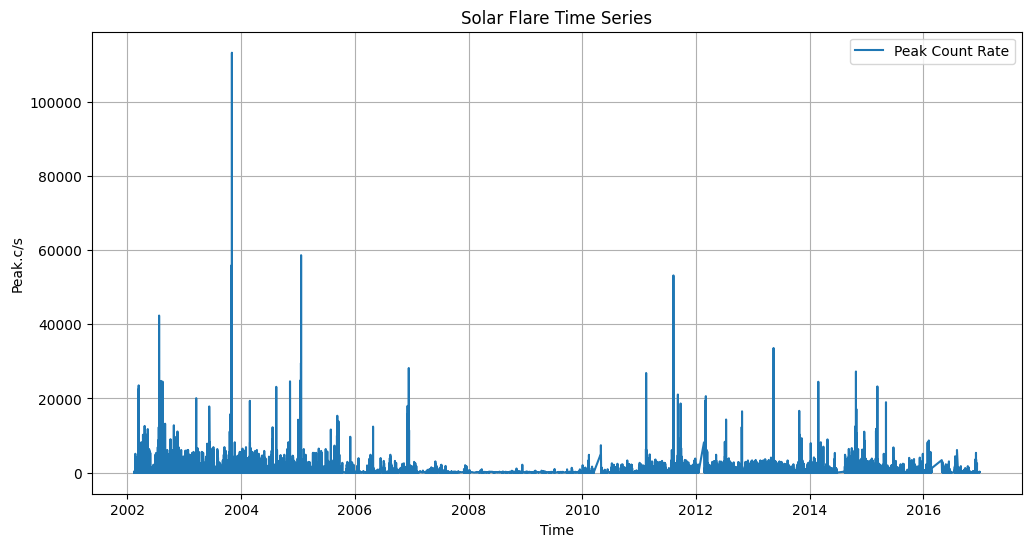

In [11]:
import matplotlib.pyplot as plt

# Plot the time series data for 'peak.c/s' and 'total.counts'
plt.figure(figsize=(12, 6))
plt.plot(solar_flare.index, solar_flare['peak.c/s'], label='Peak Count Rate')
plt.title('Solar Flare Time Series')
plt.xlabel('Time')
plt.ylabel('Peak.c/s')
plt.legend()
plt.grid(True)
plt.show()

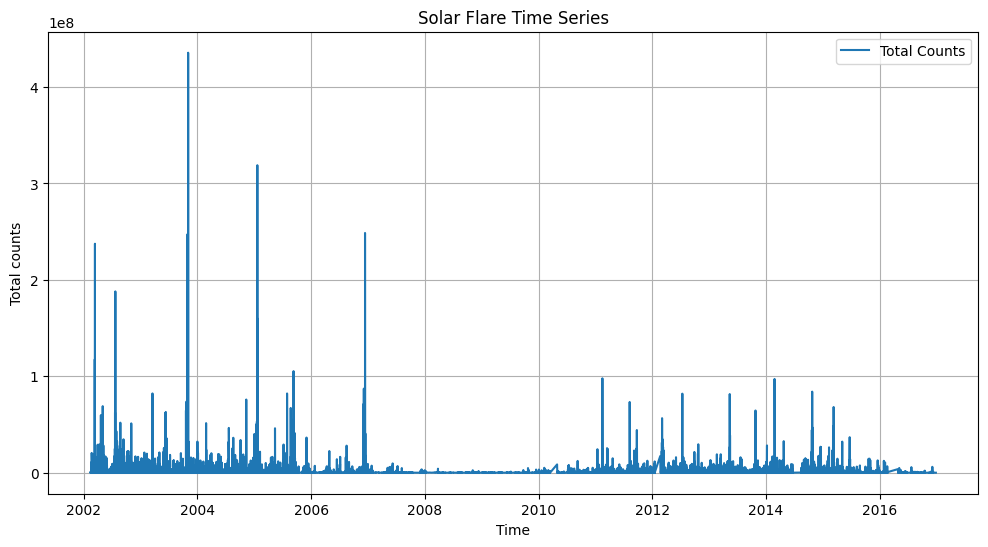

In [12]:
import matplotlib.pyplot as plt

# Plot the time series data for 'peak.c/s' and 'total.counts'
plt.figure(figsize=(12, 6))
plt.plot(solar_flare.index, solar_flare['total.counts'], label='Total Counts')
plt.title('Solar Flare Time Series')
plt.xlabel('Time')
plt.ylabel('Total counts')
plt.legend()
plt.grid(True)
plt.show()

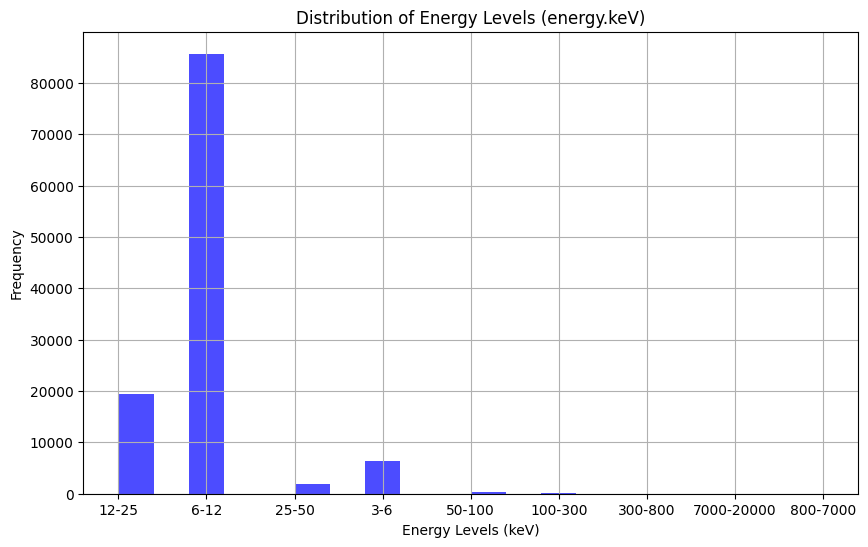

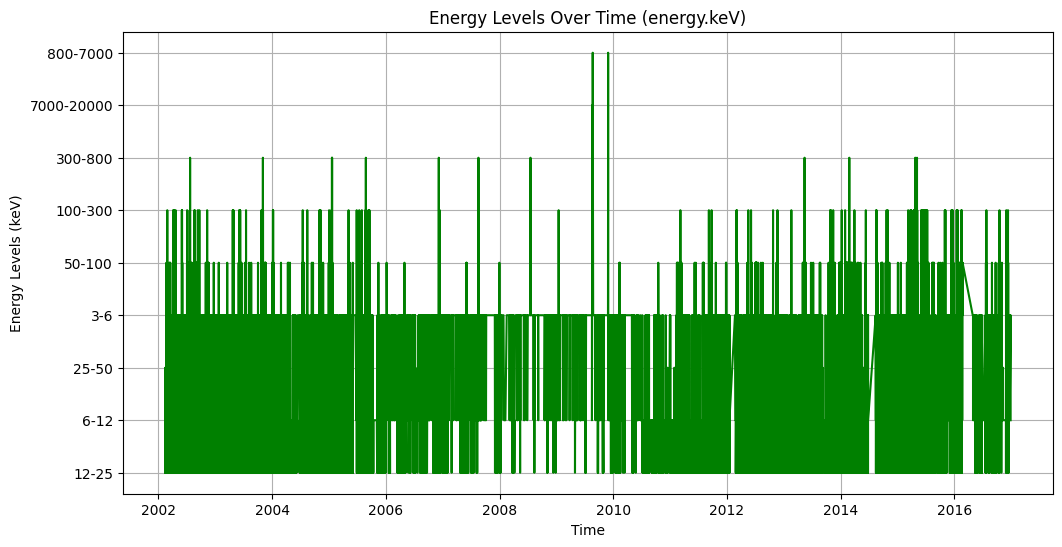

In [13]:
import matplotlib.pyplot as plt

# Histogram of energy.keV
plt.figure(figsize=(10, 6))
plt.hist(solar_flare['energy.kev'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Energy Levels (energy.keV)')
plt.xlabel('Energy Levels (keV)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Time Series Plot of energy.keV
plt.figure(figsize=(12, 6))
plt.plot(solar_flare.index, solar_flare['energy.kev'], color='green')
plt.title('Energy Levels Over Time (energy.keV)')
plt.xlabel('Time')
plt.ylabel('Energy Levels (keV)')
plt.grid(True)
plt.show()


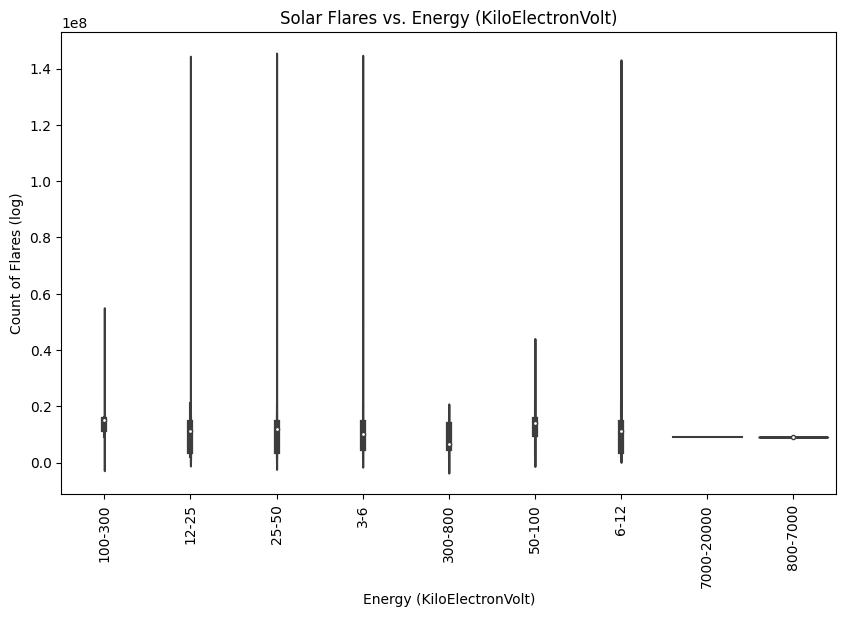

In [14]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=solar_flare, x='energy.kev', y='flare', fill='gold')
plt.title('Solar Flares vs. Energy (KiloElectronVolt)')
plt.xlabel('Energy (KiloElectronVolt)')
plt.ylabel('Count of Flares (log)')
plt.xticks(rotation=90)
plt.show()

# Peak c/s - Target variable 1 

## 100 Epoch training
In the context of training machine learning models, an epoch refers to one complete pass through the entire training dataset. During an epoch, the model is exposed to all the training examples once, and the model's parameters are updated based on the loss calculated for those examples.<br>
<br>
Here's how the training process typically works within each epoch:<br>
<br>
The training dataset is divided into batches or mini-batches. Each batch contains a subset of the training examples.<br>
<br>
The model processes each batch in sequence, calculates the loss for that batch, and updates its parameters (e.g., weights and biases) using an optimization algorithm (e.g., gradient descent).<br>
<br>
This process is repeated for each batch in the training dataset.<br>
<br>
Once all the batches have been processed, the model has completed one epoch. The number of epochs you specify when training a machine learning model determines how many times the entire training dataset will be processed in this manner.<br>
<br>
The purpose of training the model through multiple epochs is to allow it to learn from the data gradually and improve its performance. The model's parameters are adjusted during each epoch to minimize the loss function, which measures the error between the model's predictions and the actual target values. As the model iteratively refines its parameters, it becomes better at making predictions on the training data. However, it's important to find the right balance in terms of the number of epochs, as training for too many epochs can lead to overfitting (where the model performs well on the training data but poorly on unseen data).

In [53]:
results=[]

# LSTM

## peak.c/s - Target variable 1

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Extract the feature you want to forecast (e.g., 'peak.c/s')
target_feature = 'peak.c/s'

# Extract the target time series data
target_data = solar_flare[target_feature].values

# Normalize the data
scaler = MinMaxScaler()
target_data = scaler.fit_transform(target_data.reshape(-1, 1))

# Create sequences and corresponding target values
look_back = 10  # Number of previous time steps to use for prediction
X, y = [], []

for i in range(len(target_data) - look_back):
    X.append(target_data[i:i + look_back])
    y.append(target_data[i + look_back])

X, y = np.array(X), np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)


Epoch 1/10
1425/1425 - 3s - loss: 5.9694e-05 - val_loss: 3.1809e-05 - 3s/epoch - 2ms/step
Epoch 2/10
1425/1425 - 3s - loss: 5.9495e-05 - val_loss: 3.1352e-05 - 3s/epoch - 2ms/step
Epoch 3/10
1425/1425 - 3s - loss: 5.9411e-05 - val_loss: 3.1490e-05 - 3s/epoch - 2ms/step
Epoch 4/10
1425/1425 - 3s - loss: 5.9391e-05 - val_loss: 3.1909e-05 - 3s/epoch - 2ms/step
Epoch 5/10
1425/1425 - 3s - loss: 5.9348e-05 - val_loss: 3.1143e-05 - 3s/epoch - 2ms/step
Epoch 6/10
1425/1425 - 3s - loss: 5.9227e-05 - val_loss: 3.1188e-05 - 3s/epoch - 2ms/step
Epoch 7/10
1425/1425 - 3s - loss: 5.9068e-05 - val_loss: 3.1313e-05 - 3s/epoch - 2ms/step
Epoch 8/10
1425/1425 - 3s - loss: 5.9106e-05 - val_loss: 3.1522e-05 - 3s/epoch - 2ms/step
Epoch 9/10
1425/1425 - 3s - loss: 5.9211e-05 - val_loss: 3.2592e-05 - 3s/epoch - 2ms/step
Epoch 10/10
1425/1425 - 3s - loss: 5.9163e-05 - val_loss: 3.1116e-05 - 3s/epoch - 2ms/step
713/713 [==============================] - 0s 587us/step


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 220.69
Mean Squared Error (MSE): 60880.28
Root Mean Squared Error (RMSE): 246.74
R-squared (R²): -1870224018.51


## energy.kev - Target variable 2 

In [54]:
model_name="LSTM"
epochs=10
batch_size=64
recurrent_dropout=0.0

In [55]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)

# Define the sequence length (number of previous categories to consider)
sequence_length = 10

# Create sequences and labels
X, y = [], []

for i in range(len(categories_encoded) - sequence_length):
    X.append(categories_encoded[i:i+sequence_length])
    y.append(categories_encoded[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create an LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(len(np.unique(categories_encoded)), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
1425/1425 [==============================] - 4s 2ms/step - loss: 0.6960 - accuracy: 0.7678 - val_loss: 0.8255 - val_accuracy: 0.7271
Epoch 2/10
1425/1425 [==============================] - 3s 2ms/step - loss: 0.6540 - accuracy: 0.7779 - val_loss: 0.8333 - val_accuracy: 0.7303
Epoch 3/10
1425/1425 [==============================] - 3s 2ms/step - loss: 0.6482 - accuracy: 0.7793 - val_loss: 0.8193 - val_accuracy: 0.7302
Epoch 4/10
1425/1425 [==============================] - 3s 2ms/step - loss: 0.6466 - accuracy: 0.7802 - val_loss: 0.8229 - val_accuracy: 0.7320
Epoch 5/10
1425/1425 [==============================] - 3s 2ms/step - loss: 0.6461 - accuracy: 0.7801 - val_loss: 0.8189 - val_accuracy: 0.7281
Epoch 6/10
1425/1425 [==============================] - 3s 2ms/step - loss: 0.6451 - accuracy: 0.7801 - val_loss: 0.8143 - val_accuracy: 0.7304
Epoch 7/10
1425/1425 [==============================] - 3s 2ms/step - loss: 0.6445 - accuracy: 0.7803 - val_loss: 0.8239 - val_accuracy:

In [56]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

# LSTM + GRU

In [57]:
model_name="LSTM + GRU"
epochs=10
batch_size=64
recurrent_dropout=0.0

In [58]:
import numpy as np
from tensorflow.keras import backend as K
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)

# Define the sequence length (number of previous categories to consider)
sequence_length = 10

# Create sequences and labels
X, y = [], []

for i in range(len(categories_encoded) - sequence_length):
    X.append(categories_encoded[i:i+sequence_length])
    y.append(categories_encoded[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create an LSTM and a GRU model in parallel
input_layer = Input(shape=(sequence_length, 1))
lstm_layer = LSTM(50)(input_layer)
gru_layer = GRU(50)(input_layer)

# Combine the LSTM and GRU outputs
combined = concatenate([lstm_layer, gru_layer], axis=-1)

output_layer = Dense(len(np.unique(categories_encoded)), activation='softmax')(combined)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
1425/1425 [==============================] - 5s 3ms/step - loss: 0.6823 - accuracy: 0.7702 - val_loss: 0.8314 - val_accuracy: 0.7286 - lr: 0.0010
Epoch 2/10
1425/1425 [==============================] - 4s 3ms/step - loss: 0.6507 - accuracy: 0.7790 - val_loss: 0.8388 - val_accuracy: 0.7304 - lr: 0.0010
Epoch 3/10
1425/1425 [==============================] - 4s 3ms/step - loss: 0.6478 - accuracy: 0.7791 - val_loss: 0.8191 - val_accuracy: 0.7302 - lr: 0.0010
Epoch 4/10
1425/1425 [==============================] - 4s 3ms/step - loss: 0.6468 - accuracy: 0.7797 - val_loss: 0.8297 - val_accuracy: 0.7301 - lr: 0.0010
Epoch 5/10
1425/1425 [==============================] - 4s 3ms/step - loss: 0.6459 - accuracy: 0.7802 - val_loss: 0.8213 - val_accuracy: 0.7310 - lr: 0.0010
Epoch 6/10
1425/1425 [==============================] - 4s 3ms/step - loss: 0.6455 - accuracy: 0.7802 - val_loss: 0.8189 - val_accuracy: 0.7300 - lr: 0.0010
Epoch 7/10
1425/1425 [==============================] - 4s

In [59]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

## Hyperparameter tuning

In [60]:
model_name="LSTM + GRU with recurrent_dropout"
epochs=10
batch_size=64
recurrent_dropout=0.6

In [61]:
import numpy as np
from tensorflow.keras import backend as K
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)

# Define the sequence length (number of previous categories to consider)
sequence_length = 10

# Create sequences and labels
X, y = [], []

for i in range(len(categories_encoded) - sequence_length):
    X.append(categories_encoded[i:i+sequence_length])
    y.append(categories_encoded[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create an LSTM and a GRU model in parallel
input_layer = Input(shape=(sequence_length, 1))
lstm_layer = LSTM(50)(input_layer)
gru_layer = GRU(50, recurrent_dropout=0.6)(input_layer)

# Combine the LSTM and GRU outputs
combined = concatenate([lstm_layer, gru_layer], axis=-1)

output_layer = Dense(len(np.unique(categories_encoded)), activation='softmax')(combined)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
1425/1425 [==============================] - 7s 4ms/step - loss: 0.6871 - accuracy: 0.7702 - val_loss: 0.8251 - val_accuracy: 0.7295 - lr: 0.0010
Epoch 2/10
1425/1425 [==============================] - 6s 4ms/step - loss: 0.6533 - accuracy: 0.7781 - val_loss: 0.8402 - val_accuracy: 0.7300 - lr: 0.0010
Epoch 3/10
1425/1425 [==============================] - 5s 4ms/step - loss: 0.6490 - accuracy: 0.7793 - val_loss: 0.8457 - val_accuracy: 0.7297 - lr: 0.0010
Epoch 4/10
1425/1425 [==============================] - 5s 4ms/step - loss: 0.6470 - accuracy: 0.7797 - val_loss: 0.8317 - val_accuracy: 0.7313 - lr: 0.0010
Epoch 5/10
1425/1425 [==============================] - 6s 4ms/step - loss: 0.6448 - accuracy: 0.7801 - val_loss: 0.8287 - val_accuracy: 0.7318 - lr: 5.0000e-04
Epoch 6/10
1425/1425 [==============================] - 5s 4ms/step - loss: 0.6446 - accuracy: 0.7798 - val_loss: 0.8240 - val_accuracy: 0.7324 - lr: 5.0000e-04
Epoch 7/10
1425/1425 [============================

In [62]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

# Stack all input variables

In [63]:
model_name="LSTM + GRU after stacking all input variables"
epochs=10
batch_size=64
recurrent_dropout=0.6

In [64]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)

      
data_duration = np.array(solar_flare['duration.s'])
data_peak = np.array(solar_flare['peak.c/s'])
data_counts = np.array(solar_flare['total.counts'])
data_x = np.array(solar_flare['x.pos.asec'])
data_y = np.array(solar_flare['y.pos.asec'])
data_radial = np.array(solar_flare['radial'])

# Define the sequence length (number of previous categories to consider)
sequence_length = 10

# Create sequences and labels
X_sequences, y_sequences = [], []

X = np.stack((data_duration, data_peak, data_counts, data_x, data_y, data_radial), axis=-1)
X = X.astype('float32')

# Use StandardScaler to scale your input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = categories_encoded

print(X)

for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i + sequence_length])
    y_sequences.append(y[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split the data into training and testing sets
train_size = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]


# Create an LSTM and a GRU model in parallel
input_layer = Input(shape=(sequence_length, X_sequences.shape[2]))
lstm_layer = LSTM(50)(input_layer)
gru_layer = GRU(50, recurrent_dropout=0.6)(input_layer)

# Combine the LSTM and GRU outputs
combined = concatenate([lstm_layer, gru_layer], axis=-1)

output_layer = Dense(len(np.unique(categories_encoded)), activation='softmax')(combined)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


[[ 0.5052518  -0.09151858 -0.06833073  0.7948817  -0.77833515  0.00481224]
 [-0.4731335  -0.24623813 -0.11971135  0.8107334  -0.7363128   0.0087093 ]
 [-0.6392744  -0.23664312 -0.11907837 -0.39663363  1.0335697  -0.39463705]
 ...
 [-0.2331522  -0.15868366 -0.11227451  0.01286719  0.10660612 -1.3435726 ]
 [ 0.06220942 -0.22584873 -0.11716121  0.4435036   0.91244644 -0.4452989 ]
 [-0.6761946  -0.1970637  -0.11920601  1.0234096   0.5960429   0.19771701]]
Epoch 1/10
1425/1425 [==============================] - 7s 4ms/step - loss: 0.7289 - accuracy: 0.7627 - val_loss: 0.8594 - val_accuracy: 0.7220 - lr: 0.0010
Epoch 2/10
1425/1425 [==============================] - 6s 4ms/step - loss: 0.6882 - accuracy: 0.7704 - val_loss: 0.8587 - val_accuracy: 0.7226 - lr: 0.0010
Epoch 3/10
1425/1425 [==============================] - 6s 4ms/step - loss: 0.6824 - accuracy: 0.7719 - val_loss: 0.8572 - val_accuracy: 0.7238 - lr: 0.0010
Epoch 4/10
1425/1425 [==============================] - 6s 4ms/step - los

In [65]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

## Feature extraction

In [66]:
model_name="LSTM + GRU after feature extraction"
epochs=10
batch_size=64
recurrent_dropout=0.6

In [67]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)

      
data_duration = np.array(solar_flare['duration.s'])
data_peak = np.array(solar_flare['peak.c/s'])
data_counts = np.array(solar_flare['total.counts'])

# Define the sequence length (number of previous categories to consider)
sequence_length = 10

# Create sequences and labels
X_sequences, y_sequences = [], []

X = np.stack((data_duration, data_peak, data_counts), axis=-1)
X = X.astype('float32')

# Use StandardScaler to scale your input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = categories_encoded

print(X)

for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i + sequence_length])
    y_sequences.append(y[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split the data into training and testing sets
train_size = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]


# Create an LSTM and a GRU model in parallel
input_layer = Input(shape=(sequence_length, X_sequences.shape[2]))
lstm_layer = LSTM(50)(input_layer)
gru_layer = GRU(50, recurrent_dropout=0.6)(input_layer)

# Combine the LSTM and GRU outputs
combined = concatenate([lstm_layer, gru_layer], axis=-1)

output_layer = Dense(len(np.unique(categories_encoded)), activation='softmax')(combined)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


[[ 0.5052518  -0.09151858 -0.06833073]
 [-0.4731335  -0.24623813 -0.11971135]
 [-0.6392744  -0.23664312 -0.11907837]
 ...
 [-0.2331522  -0.15868366 -0.11227451]
 [ 0.06220942 -0.22584873 -0.11716121]
 [-0.6761946  -0.1970637  -0.11920601]]
Epoch 1/10
1425/1425 [==============================] - 7s 4ms/step - loss: 0.7602 - accuracy: 0.7592 - val_loss: 0.9142 - val_accuracy: 0.7166 - lr: 0.0010
Epoch 2/10
1425/1425 [==============================] - 6s 4ms/step - loss: 0.7261 - accuracy: 0.7624 - val_loss: 0.9027 - val_accuracy: 0.7168 - lr: 0.0010
Epoch 3/10
1425/1425 [==============================] - 6s 4ms/step - loss: 0.7201 - accuracy: 0.7633 - val_loss: 0.9093 - val_accuracy: 0.7163 - lr: 0.0010
Epoch 4/10
1425/1425 [==============================] - 6s 4ms/step - loss: 0.7152 - accuracy: 0.7645 - val_loss: 0.8949 - val_accuracy: 0.7165 - lr: 0.0010
Epoch 5/10
1425/1425 [==============================] - 6s 4ms/step - loss: 0.7122 - accuracy: 0.7648 - val_loss: 0.8933 - val_accur

In [68]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

## For a single year

In [69]:
# Extract data for the year 2022
year_to_extract = 2014
solar_flare_for_2014 =  solar_flare[solar_flare.index.year == year_to_extract]

solar_flare_for_2014

,flare,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
start_datetime,,,,,,,,,,,,,,
2014-01-01 00:14:02,14010101,560,46,80328.0,12-25,-982,-120,989,0,A1,P1,PE,Q1,NaN
2014-01-01 00:34:18,14010102,304,30,43920.0,6-12,-970,-217,994,0,A1,P1,PE,Q1,NaN
2014-01-01 01:33:02,14010103,320,36,48384.0,12-25,-232,-208,312,0,A1,P1,PE,Q1,NaN
2014-01-01 04:39:54,14010104,100,20,9384.0,12-25,-970,-87,974,0,A1,P1,PE,Q1,NaN
2014-01-01 06:48:22,14010105,940,40,105912.0,12-25,-979,-86,983,0,A1,DR,P1,PE,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 21:42:54,14123171,380,34,27000.0,6-12,-780,-85,785,2253,A0,P1,PE,Q1,NaN
2014-12-31 21:50:46,14123172,348,28,20220.0,6-12,-785,-84,789,2253,A0,P1,PE,Q1,NaN
2014-12-31 21:55:02,14123173,24,24,1584.0,6-12,-788,-62,790,2253,A0,GE,P1,PE,Q2


In [70]:
model_name="LSTM + GRU for a single year"
epochs=10
batch_size=64
recurrent_dropout=0.6

In [71]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)

      
data_duration = np.array(solar_flare['duration.s'])
data_peak = np.array(solar_flare['peak.c/s'])
data_counts = np.array(solar_flare['total.counts'])

# Define the sequence length (number of previous categories to consider)
sequence_length = 20

# Create sequences and labels
X_sequences, y_sequences = [], []

X = np.stack((data_duration, data_peak, data_counts), axis=-1)
X = X.astype('float32')

# Use StandardScaler to scale your input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = categories_encoded

print(X)

for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i + sequence_length])
    y_sequences.append(y[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split the data into training and testing sets
train_size = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]


# Create an LSTM and a GRU model in parallel
input_layer = Input(shape=(sequence_length, X_sequences.shape[2]))
lstm_layer = LSTM(50)(input_layer)
gru_layer = GRU(50, recurrent_dropout=0.6)(input_layer)

# Combine the LSTM and GRU outputs
combined = concatenate([lstm_layer, gru_layer], axis=-1)

output_layer = Dense(len(np.unique(categories_encoded)), activation='softmax')(combined)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


[[ 0.5052518  -0.09151858 -0.06833073]
 [-0.4731335  -0.24623813 -0.11971135]
 [-0.6392744  -0.23664312 -0.11907837]
 ...
 [-0.2331522  -0.15868366 -0.11227451]
 [ 0.06220942 -0.22584873 -0.11716121]
 [-0.6761946  -0.1970637  -0.11920601]]
Epoch 1/10
1424/1424 [==============================] - 11s 7ms/step - loss: 0.7563 - accuracy: 0.7587 - val_loss: 0.9001 - val_accuracy: 0.7169 - lr: 0.0010
Epoch 2/10
1424/1424 [==============================] - 10s 7ms/step - loss: 0.7192 - accuracy: 0.7630 - val_loss: 0.9101 - val_accuracy: 0.7168 - lr: 0.0010
Epoch 3/10
1424/1424 [==============================] - 10s 7ms/step - loss: 0.7131 - accuracy: 0.7640 - val_loss: 0.8943 - val_accuracy: 0.7168 - lr: 0.0010
Epoch 4/10
1424/1424 [==============================] - 10s 7ms/step - loss: 0.7088 - accuracy: 0.7652 - val_loss: 0.8871 - val_accuracy: 0.7168 - lr: 0.0010
Epoch 5/10
1424/1424 [==============================] - 10s 7ms/step - loss: 0.7053 - accuracy: 0.7658 - val_loss: 0.9022 - val_

In [72]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

In [73]:
model_name="LSTM + GRU for a single year"
epochs=10
batch_size=64
recurrent_dropout=0.9

In [74]:
solar_flare = solar_flare_for_2014

import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)

      
data_duration = np.array(solar_flare['duration.s'])
data_peak = np.array(solar_flare['peak.c/s'])
data_counts = np.array(solar_flare['total.counts'])

# Define the sequence length (number of previous categories to consider)
sequence_length = 10

# Create sequences and labels
X_sequences, y_sequences = [], []

X = np.stack((data_duration, data_peak, data_counts), axis=-1)
X = X.astype('float32')

# Use StandardScaler to scale your input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = categories_encoded

print(X)

for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i + sequence_length])
    y_sequences.append(y[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split the data into training and testing sets
train_size = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]


# Create an LSTM and a GRU model in parallel
input_layer = Input(shape=(sequence_length, X_sequences.shape[2]))
lstm_layer = LSTM(50)(input_layer)
gru_layer = GRU(50, recurrent_dropout=0.9)(input_layer)

# Combine the LSTM and GRU outputs
combined = concatenate([lstm_layer, gru_layer], axis=-1)

output_layer = Dense(len(np.unique(categories_encoded)), activation='softmax')(combined)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=6, batch_size=1000, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


[[ 0.09158544 -0.25122917 -0.13183062]
 [-0.46820682 -0.2743648  -0.153873  ]
 [-0.43321982 -0.26568893 -0.15117037]
 ...
 [-1.0804796  -0.28304067 -0.17950433]
 [ 0.6951115   1.3248874   0.5627658 ]
 [ 1.3423713   0.8621743   1.0217108 ]]
Epoch 1/6
11/11 [==============================] - 1s 39ms/step - loss: 1.8759 - accuracy: 0.4416 - val_loss: 1.7524 - val_accuracy: 0.7025 - lr: 0.0010
Epoch 2/6
11/11 [==============================] - 0s 24ms/step - loss: 1.6265 - accuracy: 0.6918 - val_loss: 1.3705 - val_accuracy: 0.7359 - lr: 0.0010
Epoch 3/6
11/11 [==============================] - 0s 23ms/step - loss: 1.1602 - accuracy: 0.7214 - val_loss: 0.8922 - val_accuracy: 0.7453 - lr: 0.0010
Epoch 4/6
11/11 [==============================] - 0s 23ms/step - loss: 0.9291 - accuracy: 0.7322 - val_loss: 0.7788 - val_accuracy: 0.7453 - lr: 0.0010
Epoch 5/6
11/11 [==============================] - 0s 23ms/step - loss: 0.8521 - accuracy: 0.7319 - val_loss: 0.7642 - val_accuracy: 0.7446 - lr: 0.

In [75]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

# Bidirectional LSTM + GRU

In [76]:
model_name="Bidirectional LSTM + GRU"
epochs=10
batch_size=64
recurrent_dropout=0.0

In [77]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Dense, Input, concatenate
from tensorflow.keras.models import Model

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)

# Define the sequence length (number of previous categories to consider)
sequence_length = 2

# Create sequences and labels
X, y = [], []

for i in range(len(categories_encoded) - sequence_length):
    X.append(categories_encoded[i:i+sequence_length])
    y.append(categories_encoded[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create a model with Bidirectional LSTM and GRU layers
input_layer = Input(shape=(sequence_length, 1))
bidirectional_lstm = Bidirectional(LSTM(50, return_sequences=True))(input_layer)
gru_layer = GRU(50)(bidirectional_lstm)

output_layer = Dense(len(np.unique(categories_encoded)), activation='softmax')(gru_layer)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/10
167/167 [==============================] - 2s 4ms/step - loss: 0.9064 - accuracy: 0.7171 - val_loss: 0.7484 - val_accuracy: 0.7462
Epoch 2/10
167/167 [==============================] - 0s 2ms/step - loss: 0.8070 - accuracy: 0.7324 - val_loss: 0.7474 - val_accuracy: 0.7462
Epoch 3/10
167/167 [==============================] - 0s 2ms/step - loss: 0.8055 - accuracy: 0.7324 - val_loss: 0.7492 - val_accuracy: 0.7462
Epoch 4/10
167/167 [==============================] - 0s 2ms/step - loss: 0.8026 - accuracy: 0.7324 - val_loss: 0.7450 - val_accuracy: 0.7462
Epoch 5/10
167/167 [==============================] - 0s 2ms/step - loss: 0.8014 - accuracy: 0.7324 - val_loss: 0.7468 - val_accuracy: 0.7462
Epoch 6/10
167/167 [==============================] - 0s 2ms/step - loss: 0.7992 - accuracy: 0.7324 - val_loss: 0.7372 - val_accuracy: 0.7462
Epoch 7/10
167/167 [==============================] - 0s 2ms/step - loss: 0.7924 - accuracy: 0.7324 - val_loss: 0.7509 - val_accuracy: 0.7462
Epoch 

In [78]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

In [79]:
results

[['LSTM', 10, 0.0, 10, 64, '73.12%'],
 ['LSTM + GRU', 10, 0.0, 10, 64, '73.11%'],
 ['LSTM + GRU with recurrent_dropout', 10, 0.6, 10, 64, '72.99%'],
 ['LSTM + GRU after stacking all input variables', 10, 0.6, 10, 64, '72.58%'],
 ['LSTM + GRU after feature extraction', 10, 0.6, 10, 64, '71.72%'],
 ['LSTM + GRU for a single year', 20, 0.6, 10, 64, '71.69%'],
 ['LSTM + GRU for a single year', 10, 0.9, 10, 64, '74.61%'],
 ['Bidirectional LSTM + GRU', 2, 0.0, 10, 64, '74.59%']]

In [81]:
import pandas as pd

headers=['Model Name', 'Sequence length', 'recurrent_dropout', 'epochs', 'batch_size', 'Accuracy%']

# Create DataFrame
df = pd.DataFrame(results, columns=headers)

# Display the DataFrame
df

,Model Name,Sequence length,recurrent_dropout,epochs,batch_size,Accuracy%
0,LSTM,10,0.0,10,64,73.12%
1,LSTM + GRU,10,0.0,10,64,73.11%
2,LSTM + GRU with recurrent_dropout,10,0.6,10,64,72.99%
3,LSTM + GRU after stacking all input variables,10,0.6,10,64,72.58%
4,LSTM + GRU after feature extraction,10,0.6,10,64,71.72%
5,LSTM + GRU for a single year,20,0.6,10,64,71.69%
6,LSTM + GRU for a single year,10,0.9,10,64,74.61%
7,Bidirectional LSTM + GRU,2,0.0,10,64,74.59%
